# Lecture 2: Programming Basics

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import brian2 as br
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
# Current: amps
# Resistance: ohms
# Charge: volts

tau = 1000*br.ms
eqs = "dv/dt = (1-v)/tau : 1"

Before v = 0.0


INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.05s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


After v = 0.095162581964


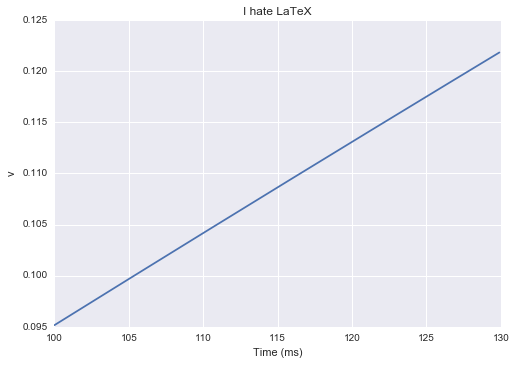

In [3]:
br.start_scope()
G = br.NeuronGroup(1, eqs)
print 'Before v =', G.v[0]
br.run(100*br.ms)
print 'After v =', G.v[0]

M = br.StateMonitor(G, 'v', record=True)
br.run(30*br.ms)

plt.plot(M.t/br.ms, M.v[0])
plt.xlabel('Time (ms)')
plt.ylabel('v')
plt.title("I hate LaTeX")

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


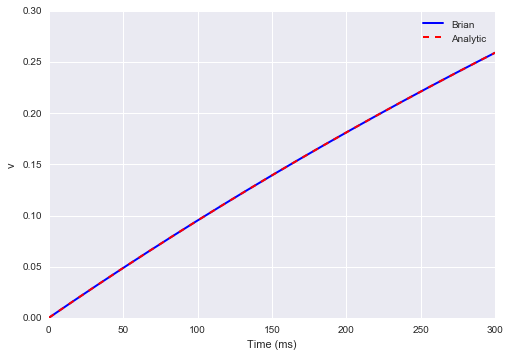

In [4]:
br.start_scope()

G = br.NeuronGroup(1, eqs)
M = br.StateMonitor(G, 'v', record=0)

br.run(300*br.ms)

plt.plot(M.t/br.ms, M.v[0], '-b', lw=2, label='Brian')
plt.plot(M.t/br.ms, 1-br.exp(-M.t/tau), '--r', lw=2, label='Analytic')
plt.xlabel('Time (ms)')
plt.ylabel('v')
plt.legend(loc='best')